In [1]:
# IMPORTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

# OPEN AND PREPARE DATA

First we will open the data. These are CSV files that are hosted on my GitHub and you will see here how to load in a dataset from GitHub using Pandas.

This dataset represents 3 groups of people at a backyard party. The 3 groups are red, blue, and green. There are then some people who's group is unknown. The task will be to estimate which group each one of them belongs in. The assumption is that people are more likely to be around others from their group

          0         1      2
0  7.550249  8.726816  green
1  7.338136  5.089574  green
2  4.976779  4.532404  green
3  8.572154  6.875010  green
4  5.638802  7.566193  green


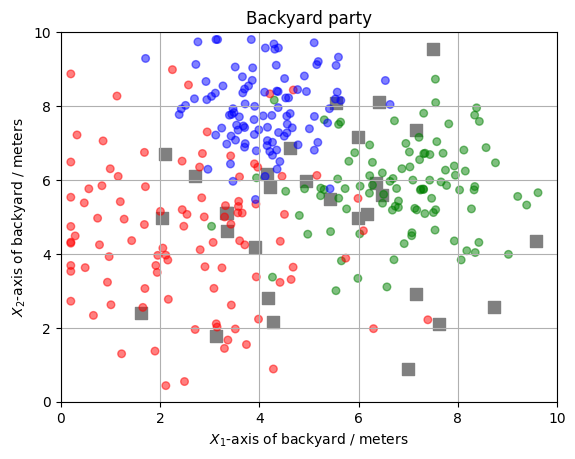

In [2]:
# KNOWN DATA
fn_features = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party.csv'#'backyard_party.csv'
df = pd.read_csv(fn_features,usecols = [1,2,3])
data = df.to_numpy(dtype=object)

print(df.head())

X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party_new_friends.csv'#'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data,usecols = [1,2])

X_new = df_nd.to_numpy(dtype=object)


# plt.figure(figsize=(4, 3),dpi = 200)  # Adjust figure size as needed
plt.figure(dpi = 100)

# Create the scatter plot with custom colors
plt.scatter(X_new[:,0],X_new[:,1],c = 'gray', marker = 's', s = 70)
plt.scatter(X[:,0],X[:,1],c = y, s = 30, alpha = 0.5)

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()

# SPLIT DATASET

It is imperative to split the data into training and testing subsets. The training subset is used to train the model, this is where it learns the underlying patterns. The testing model, *which was hidden from the model during training* is then used to evaluate the performance of the model.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# for 300 datapoints 20% is good, if dataset was smaller could increase this

# APPLY KNN!

Now we will define and apply the KNN model. I encourage you to mess around with the options in the KNeighborsClassifier function, such as the number of neighbors or metric. You should look up the documentation to read about the various input parameters.

X_train (240, 2)
X_test (60, 2)
y_train (240,)
y_test (60,)
y_pred (60,)


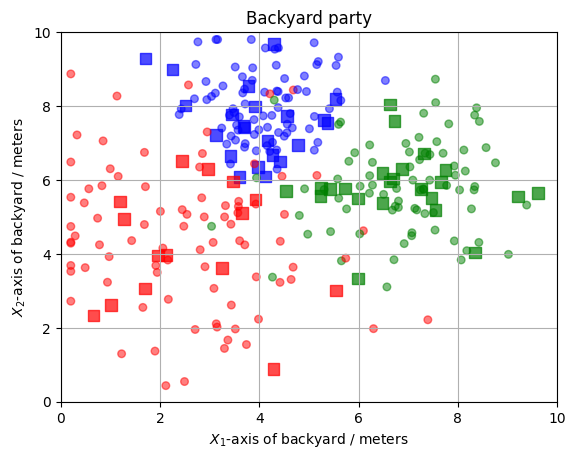

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier (experiment with different k values)
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')  # Choose a number of neighbors

# Train the KNN model on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

for idx,x in enumerate([X_train, X_test, y_train, y_test,y_pred]):
    print(['X_train', 'X_test', 'y_train', 'y_test','y_pred'][idx],np.shape(x))

# Print the predicted labels
# print("Predicted labels:", y_pred)

plt.figure(dpi = 100)

# Create the scatter plot with custom colors
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred, marker = 's', s = 70, alpha = 0.7)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train, s = 30, alpha = 0.5)

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()

# ACCURACY METRICS

Here we will calculate the classifcation accuracy metrics.

Accuracy: 0.80000
Confusion Matrix:
[[17  2  3]
 [ 1 20  1]
 [ 4  1 11]]
Precision: 0.79188
Recall: 0.78977


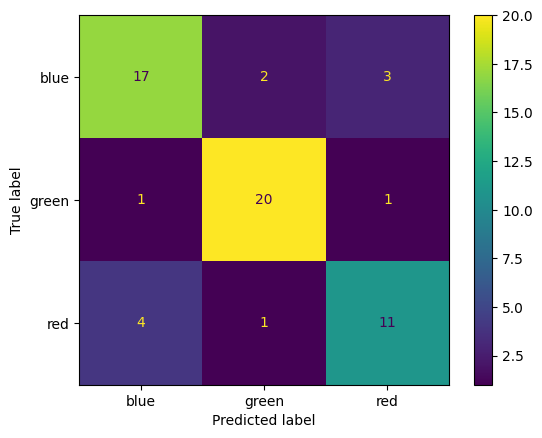

In [ ]:
'''
APPLY TO KNN
'''

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = y_test
# y_pred =

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.5f}')

# Calculate Confusion Matrix
party_labels = knn.classes_ # this gets the label names from the model

conf_matrix = confusion_matrix(y_true, y_pred, labels = party_labels)
print(f'Confusion Matrix:\n{conf_matrix}')

# this plots the confusion matrix
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=party_labels)
fig, ax = plt.subplots(dpi = 100)
cmd.plot(ax=ax)

# Calculate Precision
precision = precision_score(y_true, y_pred, average = 'macro')
print(f'Precision: {precision:.5f}')

# Calculate Recall
recall = recall_score(y_true, y_pred, average = 'macro')
print(f'Recall: {recall:.5f}')

# CROSS VALIDATION

Cross validation is a technique in machine learning for assessing how well your model generalizes to different data.

Remember when you split the data into training and testing, and used that to evaluate the performance of the model. Cross validation essentially repeats this process by doing a new split and seeing how the accuracy metrics change.

Cross validation provides a more robust estimate of your model's performance by repeating the testing over different subsets of the data.

When setting up cross validation, after selecting your model, you set parameters like the number of folds (aka the number of ways the dataet is split). You also pick the scoring, which is the metric that will be used to evaluate your model.

Read more about cross validation here:

https://scikit-learn.org/1.5/modules/cross_validation.html

In [ ]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# # LOAD DATA
# fn_features = 'backyard_party.csv'
# df = pd.read_csv(fn_features,usecols = [1,2,3])
# data = df.to_numpy(dtype=object)

X = data[:,0:2]
y = data[:,2]

# use with KNN  model
K_neighbors = 10
knn = KNeighborsClassifier(n_neighbors = K_neighbors)


# define kfold object
num_splits = 5 # this is the K in k-folds
kfold = KFold(n_splits = num_splits, shuffle = True, random_state = 42)

# use cross_val_score for K-fold cross-validation with accuracy scoring
accuracy_scores = cross_val_score(knn,X,y,cv = kfold, scoring = 'accuracy')

# print accuracy scores and mean accuracy
print(f'accuracy scores = {accuracy_scores}')
print(f'Average accuracy of folds: <accuracy> = {np.mean(accuracy_scores)}')

# if generate 500 data points can seperate some for validation
# in train test split can also get validation, 15-20% for val, same for test, 70% for training

accuracy scores = [0.81666667 0.86666667 0.93333333 0.91666667 0.91666667]
Average accuracy of folds: <accuracy> = 0.89


# HYPERPARAMETER TUNING

In machine learning models there are parameters and hyperparameters. Parameters are what are learned during training. Hyperparameters are set by the researcher, in a way they can thought to be "external" to the model.

Hyperparameter tuning is similar in a way to cross validation, it is a robust way to determine the optimal set of hyperparameters.

This is done by first defining a "grid" of hyperparameters. You define a range and a granularity. Let's say the hyperparameters are called A and B. You define a range for each, let's say A is 1,2, and 3. B is 100, 200, and 300. There are now 9 possible hyperparameter pairs, [1,100], [1,200], [1,300], [2,100]... etc.

Now let's describe the different methods of hyperparameter tuning.

- **Grid search**

For this method, the hyperparameter grid is defined as explained above, and then every single possibile combination is tested. This ensures the best result from the defined ranges, but can be computationally expensive especially as you add more hyperparameters.

- **Random search**

Similar to grid search but instead of every possible combination of hyperparameters being tested, random combinations are sampled. This is more efficient but might not find the most optimal combination.

- **Bayesian optimization**

This is for if you have an idea of which hyperparameters are best, probability distributions of the likelihood of each hyperparameter being optimal are used, to more efficiently search for the optimal combination. This combines aspects of the grid search and random search.

In [ ]:
from sklearn.model_selection import GridSearchCV

# define hyperparameters and their range
param_grid = {'n_neighbors': np.arange(3,30)}

# create gridsearchcv object
grid_search = GridSearchCV(estimator = KNeighborsClassifier(metric = 'euclidean'),
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5)

# LOAD DATA
# fn_features = 'backyard_party.csv'
# df = pd.read_csv(fn_features,usecols = [1,2,3])
# data = df.to_numpy(dtype=object)
X = data[:,0:2]
y = data[:,2]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print('optimized parameters:',best_params)
# print(best_params['n_neighbors'])

optimized parameters: {'n_neighbors': 11}


Accuracy: 0.83333
Confusion Matrix:
[[18  2  2]
 [ 1 20  1]
 [ 3  1 12]]
Precision: 0.82925
Recall: 0.82576


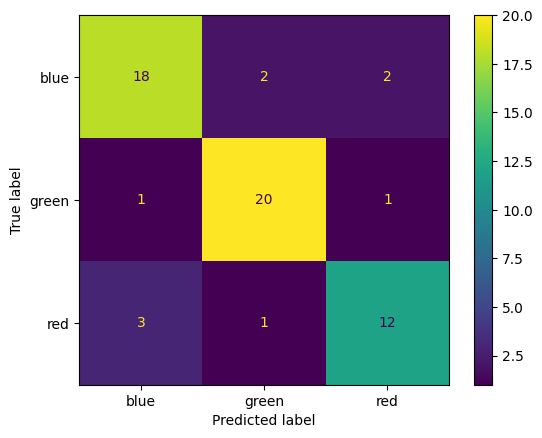

In [ ]:
# Define the KNN classifier with the optimized K value
K_optimized = best_params['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=K_optimized, metric = 'euclidean')  # Choose a number of neighbors

# Train the KNN model on the training set
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = y_test

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.5f}')

# Calculate Confusion Matrix
party_labels = knn.classes_ #['green','red','blue']

conf_matrix = confusion_matrix(y_true, y_pred, labels =party_labels)
print(f'Confusion Matrix:\n{conf_matrix}')
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=party_labels)
fig, ax = plt.subplots()
cmd.plot(ax=ax)

# Calculate Precision
precision = precision_score(y_true, y_pred, average = 'macro')
print(f'Precision: {precision:.5f}')

# Calculate Recall
recall = recall_score(y_true, y_pred, average = 'macro')
print(f'Recall: {recall:.5f}')

# NOW APPLY KNN TO THE UNKNOWN DATA

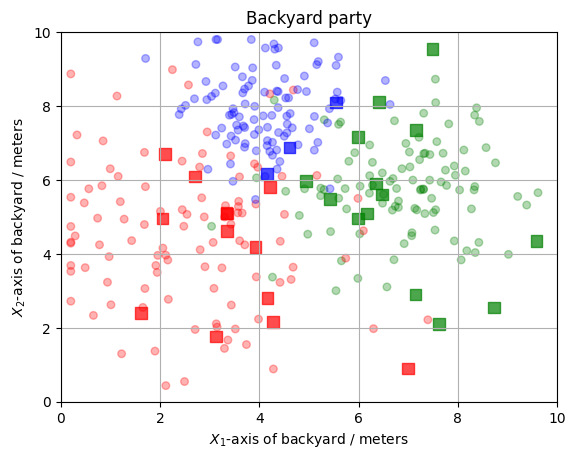

(30,)

In [ ]:
'''
load data
'''

# KNOWN DATA
fn_features = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party.csv'#'backyard_party.csv'
df = pd.read_csv(fn_features,usecols = [1,2,3])
data = df.to_numpy(dtype=object)

X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party_new_friends.csv'#'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data,usecols = [1,2])

X_new = df_nd.to_numpy(dtype=object)



# Make predictions on the unknown data set, THIS ALL YOU NEED, model has already been trained with optimized K
y_pred = knn.predict(X_new)

'''
plot results
'''

plt.figure(dpi = 100)

# Create the scatter plot with custom colors
plt.scatter(X_new[:,0],X_new[:,1],c = y_pred, marker = 's', s = 70, alpha = 0.7)
plt.scatter(X[:,0],X[:,1],c = y, s = 30, alpha = 0.3)

# Add labels and title
plt.xlabel(r'$X_1$-axis of backyard / meters')
plt.ylabel(r'$X_2$-axis of backyard / meters')
plt.title('Backyard party')

plt.xlim([0,10]);plt.ylim([0,10])

plt.grid()
plt.show()

np.shape(y_pred)

# this estimates what group they are likely to be in
# confidence is the accuracy score which is ~85

# BONUS: SUPPORT VECTOR MACHINE FOR CLASSIFICATION

In the cells below I will demonstrate how to do a support vector machine analysis on the same dataset. Just like with K-nearest neighbors I encourage you to read up on the documentation and mess around with the hyperparameters.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.preprocessing import LabelEncoder  # For label encoding (optional)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# KNOWN DATA
fn_features = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party.csv'#'backyard_party.csv'
df = pd.read_csv(fn_features,usecols = [1,2,3])
data = df.to_numpy(dtype=object)

X = data[:,0:2]
y = data[:,2]

# UNKNOWN DATA
fn_new_data = 'https://raw.githubusercontent.com/akshayghosh-acenet/IntroMachineLearning2/refs/heads/main/backyard_party_new_friends.csv'#'backyard_party_new_friends.csv'
df_nd = pd.read_csv(fn_new_data,usecols = [1,2])

X_new = df_nd.to_numpy(dtype=object)


# If labels are not already numerical (strings)
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)


# Define the SVC model (experiment with different kernel and C values)
svc_model = SVC(kernel='rbf', C=1.0)  # Choose a kernel function and regularization parameter

# Train the model on the training data
svc_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svc_model.predict(X_test)

# Calculate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

SVM Model Accuracy: 0.8


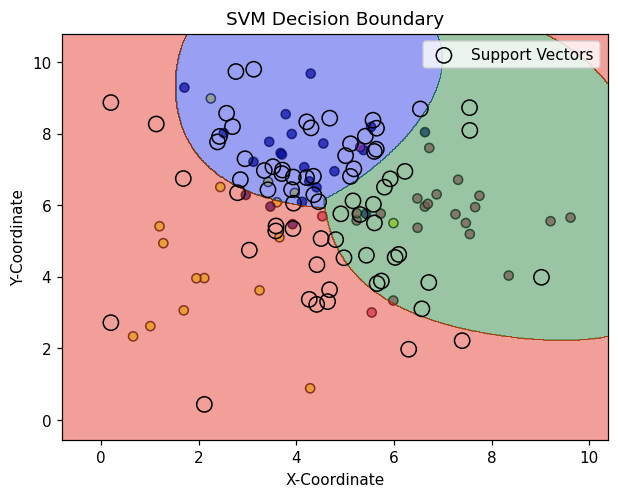

In [ ]:
# plot SVM

import matplotlib.colors as colors

# Define color transitions and names (adjust colors and names as desired)
colors_list = [(0, 'blue'), (0.5, 'green'), (1, 'red')]

# Create a custom colormap
cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', colors_list, N=256)


# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size for the mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in the mesh grid
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted labels to a 2D array matching the mesh grid
Z = Z.reshape(xx.shape)  # Reshape Z to match xx and yy dimensions

# # Convert predicted labels (strings) to colors using the label_color_map
# color_grid = np.array([label_color_map[label] for label in Z.ravel()])
# color_grid = color_grid.reshape(xx.shape)  # Reshape color grid to match xx and yy


# Plot the scatter plot
plt.figure(dpi = 110)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='plasma', edgecolors='k', alpha=0.7)  # Adjust colormap and alpha as desired

# Plot the decision boundary contours
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)  # Adjust colormap and alpha as desired

# Optional: Plot the support vectors (if applicable for your chosen kernel)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('SVM Decision Boundary')
plt.legend()
# plt.title('SVM on testing data')
plt.show()

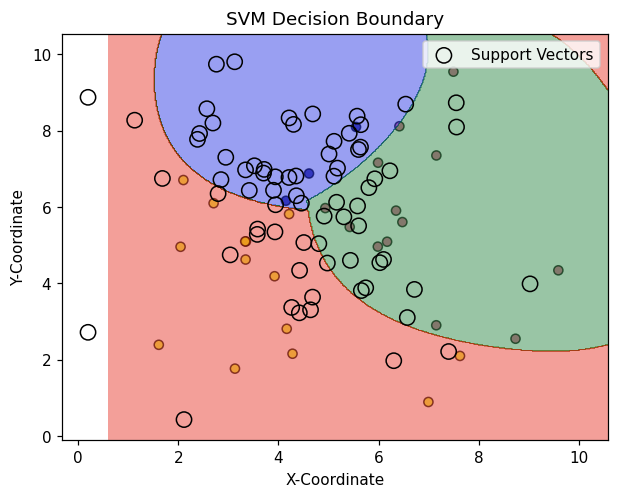

In [ ]:
# Make predictions on the testing set
y_pred_svm = svc_model.predict(X_new)

# print(y_pred_svm)

import matplotlib.colors as colors

# Define color transitions and names (adjust colors and names as desired)
colors_list = [(0, 'blue'), (0.5, 'green'), (1, 'red')]

# Create a custom colormap
cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', colors_list, N=256)


# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size for the mesh grid
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict labels for each point in the mesh grid
Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted labels to a 2D array matching the mesh grid
Z = Z.reshape(xx.shape)  # Reshape Z to match xx and yy dimensions

# # Convert predicted labels (strings) to colors using the label_color_map
# color_grid = np.array([label_color_map[label] for label in Z.ravel()])
# color_grid = color_grid.reshape(xx.shape)  # Reshape color grid to match xx and yy


# Plot the scatter plot
plt.figure(dpi = 110)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred_svm, cmap='plasma', edgecolors='k', alpha=0.7)  # Adjust colormap and alpha as desired

# Plot the decision boundary contours
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.4)  # Adjust colormap and alpha as desired

# Optional: Plot the support vectors (if applicable for your chosen kernel)
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('SVM Decision Boundary')
plt.legend()
# plt.title('SVM on unknown data')
plt.show()